In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import folium
from geopy.distance import geodesic

ox.settings.log_console = True
ox.settings.use_cache = True

In [2]:
# north, south, east, west = 35.8, 35.6, 139.9, 139.6
north, east = 35.673697, 139.672884
# south, west = 35.650446, 139.631692
south, west = 35.665184, 139.640157

north, east = 35.667341, 139.614472
south, west = 35.658199, 139.602862

bbox = (east, south, west, north)

def rectangle_dimensions_km_geopy(sw_lat, sw_lon, ne_lat, ne_lon):
    height_km = geodesic((sw_lat, sw_lon), (ne_lat, sw_lon)).kilometers
    width_km = geodesic((sw_lat, sw_lon), (sw_lat, ne_lon)).kilometers
    return width_km, height_km

width, height = rectangle_dimensions_km_geopy(south, west, north, east)
print(f'{width:.2f}km x {height:.2f}km')

1.05km x 1.01km


In [3]:
m = folium.Map(location=[sum((north, south)) / 2, sum((east, west)) / 2], zoom_start=17)

rectangle_bounds = [[min(north, south), min(east, west)], [max(north, south), max(east, west)]]

folium.Rectangle(
    bounds=rectangle_bounds,
    color='blue',
    fill=True,
    fill_color='red',
    fill_opacity=0.3,
    popup='My Rectangle'
).add_to(m)
m

In [4]:
cyclosm_tiles = 'https://{s}.tile-cyclosm.openstreetmap.fr/cyclosm/{z}/{x}/{y}.png'
cyclosm_attribution = '&copy; <a href="https://www.cyclosm.org/">CyclOSM</a>'

m = folium.Map(location=[sum((north, south)) / 2, sum((east, west)) / 2], zoom_start=17, tiles=cyclosm_tiles, attr=cyclosm_attribution)

rectangle_bounds = [[min(north, south), min(east, west)], [max(north, south), max(east, west)]]

folium.Rectangle(
    bounds=rectangle_bounds,
    color='blue',
    fill=True,
    fill_color='red',
    fill_opacity=0.3,
    # popup='My Rectangle'
).add_to(m)
m

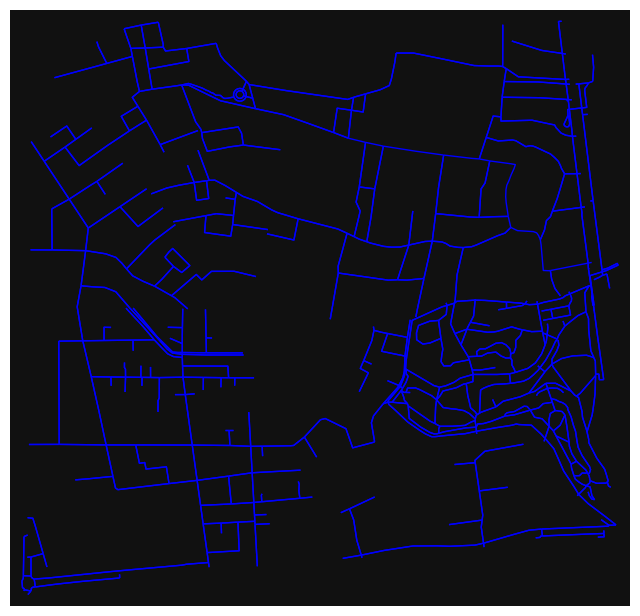

In [6]:
# graph = ox.graph_from_bbox((north, south, east, west), network_type='bike', simplify=False)
custom_filter = (
    '["highway"~"cycleway|path|footway|living_street|pedestrian|residential|service|track"]'
    '["bicycle"!~"no"]["access"!~"private"]'
)
# custom_filter = (
#     '["highway"~"cycleway|path|footway|bridleway|living_street|pedestrian|residential|service|track|unclassified|primary|secondary|tertiary"]'
#     '["bicycle"!~"no"]["access"!~"private"]'
#     '["cycleway"~"lane|track|shared|opposite|"]'
# )
graph = ox.graph_from_bbox(bbox, custom_filter=custom_filter)
fig, ax = ox.plot_graph(graph, show=False, close=False, edge_color='blue', node_size=0)

In [7]:
nodes, edges = ox.graph_to_gdfs(graph)

m = folium.Map(
    location=[sum((north, south)) / 2, sum((east, west)) / 2], 
    zoom_start=14
)

for _, row in edges.iterrows():
    # if 'cycleway' in row.keys() or 'bicycle' in row.keys():
    folium.PolyLine(
        locations=[(lat, lon) for lon, lat in row['geometry'].coords],
        color='blue',
        weight=3,
        opacity=0.2,
        popup=f"Bike Lane: {row.get('cycleway', 'yes')}"
    ).add_to(m)

folium.Rectangle(
    bounds=rectangle_bounds,
    color='red',
    fill=False,
    # fill_color='red',
    # fill_opacity=0.3,
    # popup='My Rectangle'
).add_to(m)

m